## Load and Merge Data

In [1]:
import pandas as pd
df_data1 = pd.read_csv('Data1.csv')
df_stockprice = pd.read_csv('StockPrice.csv')

df_data1['Date'] = pd.to_datetime(df_data1['Date'])
df_stockprice['Date'] = pd.to_datetime(df_stockprice['Date'])

df_merged = pd.merge(df_data1, df_stockprice, on='Date', how='inner')

df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)

print("DataFrames loaded, merged, and sorted successfully.")
print("First 5 rows of the merged DataFrame:")
print(df_merged.head())

DataFrames loaded, merged, and sorted successfully.
First 5 rows of the merged DataFrame:
        Date   Data    Price
0 2010-01-04  0.700  1178.00
1 2010-01-05  0.699  1181.50
2 2010-01-06  0.694  1182.25
3 2010-01-07  0.692  1186.75
4 2010-01-08  0.691  1190.75


## Feature Engineering and Preprocessing

In [2]:
print("Checking for missing values in df_merged:")
print(df_merged.isnull().sum())

Checking for missing values in df_merged:
Date     0
Data     0
Price    0
dtype: int64


In [3]:
df_merged['Data_Change'] = df_merged['Data'].diff()
df_merged['Data_Change'] = df_merged['Data_Change'].fillna(0)

print("First 5 rows with 'Data_Change' feature:")
print(df_merged.head())

First 5 rows with 'Data_Change' feature:
        Date   Data    Price  Data_Change
0 2010-01-04  0.700  1178.00        0.000
1 2010-01-05  0.699  1181.50       -0.001
2 2010-01-06  0.694  1182.25       -0.005
3 2010-01-07  0.692  1186.75       -0.002
4 2010-01-08  0.691  1190.75       -0.001


In [4]:
from sklearn.preprocessing import StandardScaler

features = ['Data', 'Data_Change']
target = 'Price'

X = df_merged[features]
y = df_merged[target]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("Features scaled successfully using StandardScaler.")
print("First 5 rows of scaled features:")
print(X_scaled_df.head())
print("Shape of scaled features:", X_scaled_df.shape)
print("Shape of target variable:", y.shape)

Features scaled successfully using StandardScaler.
First 5 rows of scaled features:
       Data  Data_Change
0  0.089852    -0.035859
1  0.089092    -0.117545
2  0.085293    -0.444292
3  0.083773    -0.199232
4  0.083013    -0.117545
Shape of scaled features: (3802, 2)
Shape of target variable: (3802,)


## Visualization of Data Before and After Standardization

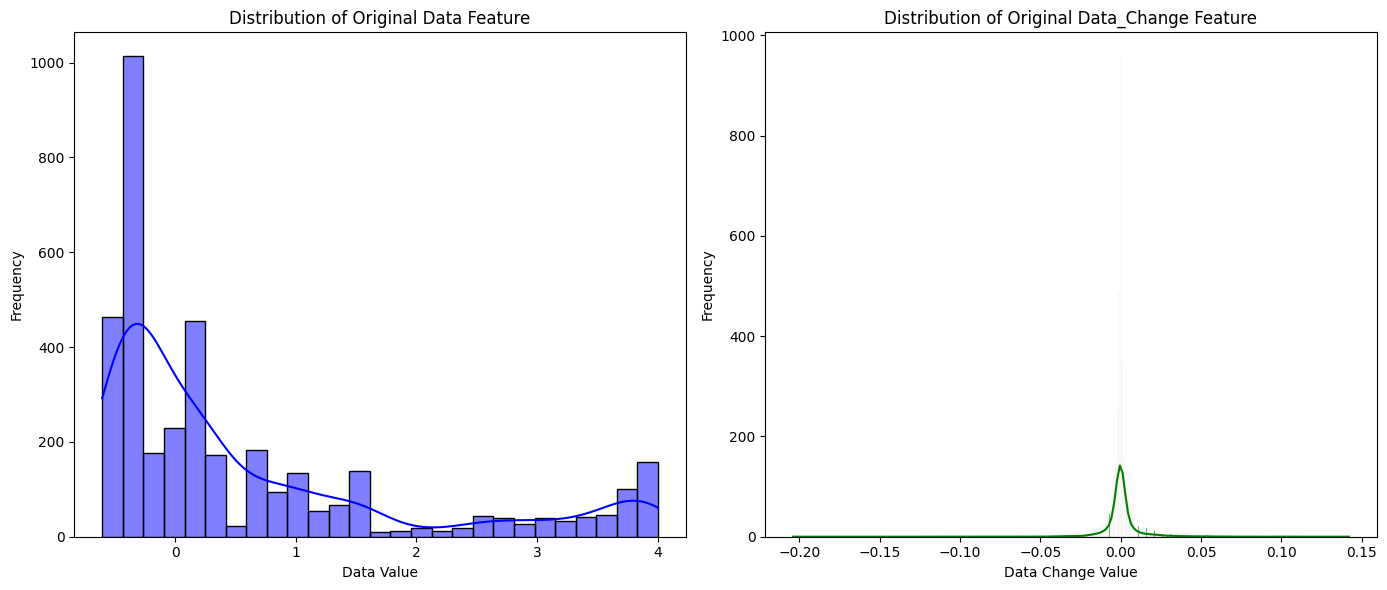

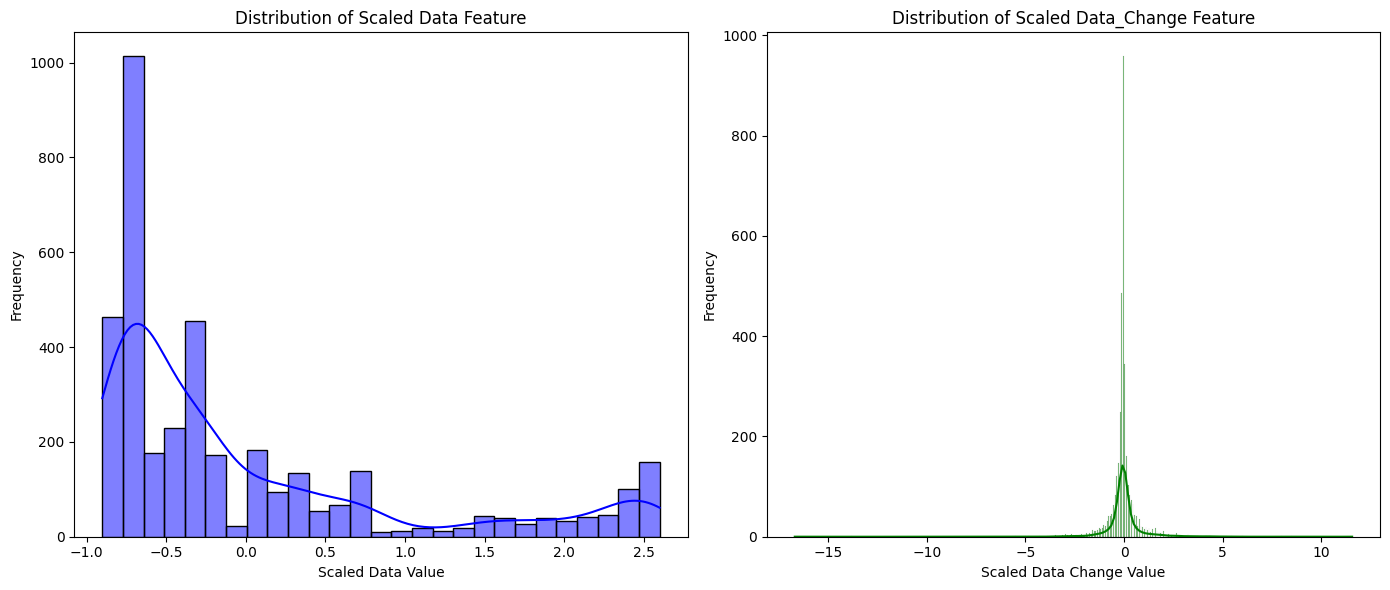

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.histplot(X['Data'], kde=True, color='blue')
plt.title('Distribution of Original Data Feature')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) 
sns.histplot(X['Data_Change'], kde=True, color='green')
plt.title('Distribution of Original Data_Change Feature')
plt.xlabel('Data Change Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.histplot(X_scaled_df['Data'], kde=True, color='blue')
plt.title('Distribution of Scaled Data Feature')
plt.xlabel('Scaled Data Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) 
sns.histplot(X_scaled_df['Data_Change'], kde=True, color='green')
plt.title('Distribution of Scaled Data_Change Feature')
plt.xlabel('Scaled Data Change Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Train Machine Learning Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Data split into training and testing sets.
X_train shape: (3041, 2), y_train shape: (3041,)
X_test shape: (761, 2), y_test shape: (761,)
Linear Regression model trained successfully.


## Evaluate Model Performance

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Model Performance on the Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Performance on the Test Set:
Mean Squared Error (MSE): 1555035.59
R-squared (R²): 0.11


## Visualize Predictions and Insights

In [7]:
import matplotlib.pyplot as plt

plot_df = pd.DataFrame({
    'Date': df_merged.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Date').reset_index(drop=True)

print("DataFrame for plotting created successfully.")
print("First 5 rows of the plot DataFrame:")
print(plot_df.head())

DataFrame for plotting created successfully.
First 5 rows of the plot DataFrame:
        Date   Actual    Predicted
0 2010-01-04  1178.00  3066.719335
1 2010-01-21  1160.25  3050.140330
2 2010-01-25  1141.75  3051.772799
3 2010-01-28  1128.50  3053.013678
4 2010-02-10  1112.50  3054.646147


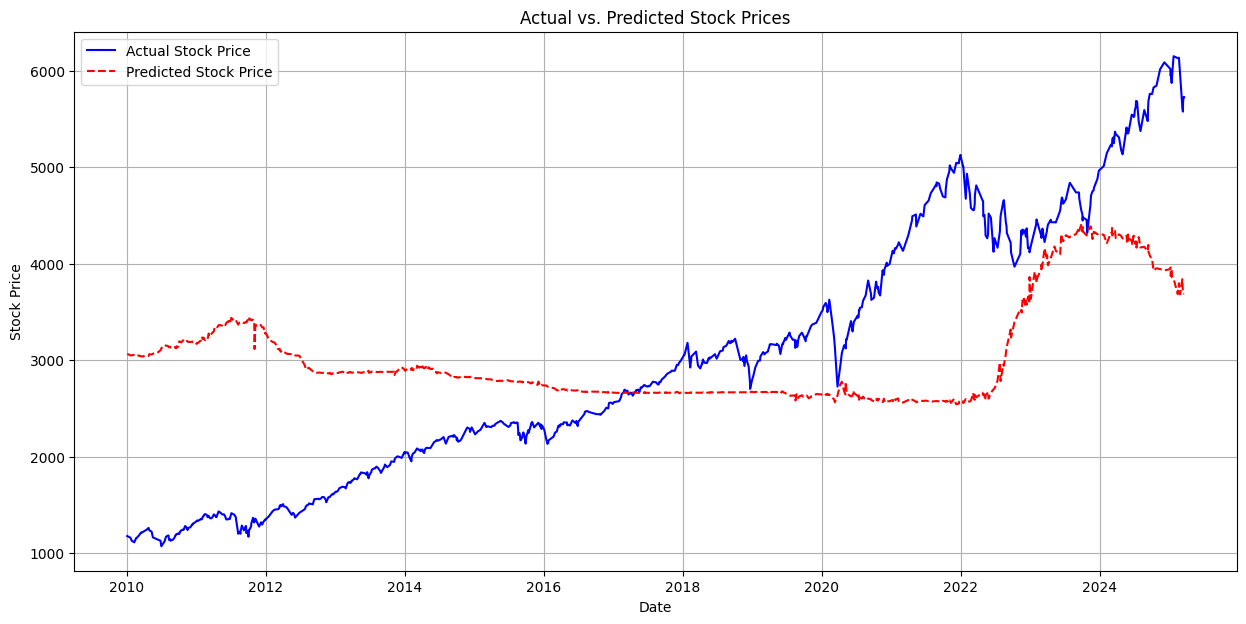

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(plot_df['Date'], plot_df['Actual'], label='Actual Stock Price', color='blue')
plt.plot(plot_df['Date'], plot_df['Predicted'], label='Predicted Stock Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

## Actual vs. Predicted Stock Prices (Scatter Plot)

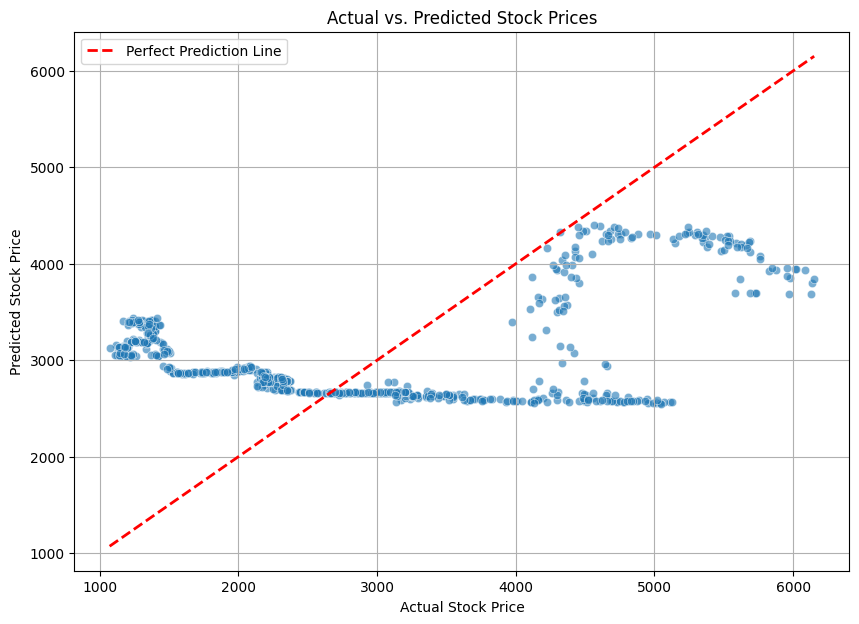

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

## Prediction Function

In [9]:
import numpy as np

def predict_stock_price(new_data_value, new_data_change_value):
    
    new_input = np.array([[new_data_value, new_data_change_value]])

    new_input_scaled = scaler.transform(new_input)

    predicted_price = model.predict(new_input_scaled)

    return predicted_price[0]

print("Prediction function created successfully.")

Prediction function created successfully.


In [10]:
# Example 1: Using the average 'Data' and 'Data_Change' from the dataset
example_data_1 = df_merged['Data'].mean()
example_data_change_1 = df_merged['Data_Change'].mean()
predicted_price_1 = predict_stock_price(example_data_1, example_data_change_1)
print(f"Predicted stock price for Data={example_data_1:.3f}, Data_Change={example_data_change_1:.3f}: {predicted_price_1:.2f}")

# Example 2: Using the last known 'Data' and 'Data_Change' from the dataset
last_data_value = df_merged['Data'].iloc[-1]
last_data_change_value = df_merged['Data_Change'].iloc[-1]
predicted_price_2 = predict_stock_price(last_data_value, last_data_change_value)
print(f"Predicted stock price for Data={last_data_value:.3f}, Data_Change={last_data_change_value:.3f}: {predicted_price_2:.2f}")

# Example 3: Custom values
custom_data_value = 1.5
custom_data_change_value = 0.01
predicted_price_3 = predict_stock_price(custom_data_value, custom_data_change_value)
print(f"Predicted stock price for Data={custom_data_value:.3f}, Data_Change={custom_data_change_value:.3f}: {predicted_price_3:.2f}")

Predicted stock price for Data=0.582, Data_Change=0.000: 3021.65
Predicted stock price for Data=2.369, Data_Change=0.004: 3731.51
Predicted stock price for Data=1.500, Data_Change=0.010: 3408.06


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\si

In [12]:
predict_stock_price(1.8,0.01)

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3525.540959453942

## Train RandomForestRegressor Model

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)

rf_r2 = r2_score(y_test, rf_y_pred)

print(f"RandomForestRegressor Model Performance on the Test Set:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")

print("\nFor comparison, Linear Regression Model Performance was:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

RandomForestRegressor Model Performance on the Test Set:
Mean Squared Error (MSE): 128679.66
R-squared (R²): 0.93

For comparison, Linear Regression Model Performance was:
Mean Squared Error (MSE): 1555035.59
R-squared (R²): 0.11


In [16]:
import matplotlib.pyplot as plt

rf_plot_df = pd.DataFrame({
    'Date': df_merged.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': rf_y_pred
}).sort_values(by='Date').reset_index(drop=True)

print("DataFrame for RandomForestRegressor plotting created successfully.")
print("First 5 rows of the RandomForestRegressor plot DataFrame:")
print(rf_plot_df.head())

DataFrame for RandomForestRegressor plotting created successfully.
First 5 rows of the RandomForestRegressor plot DataFrame:
        Date   Actual    Predicted
0 2010-01-04  1178.00  1141.307750
1 2010-01-21  1160.25  1330.070000
2 2010-01-25  1141.75  1184.670411
3 2010-01-28  1128.50  1132.021141
4 2010-02-10  1112.50  1335.350667


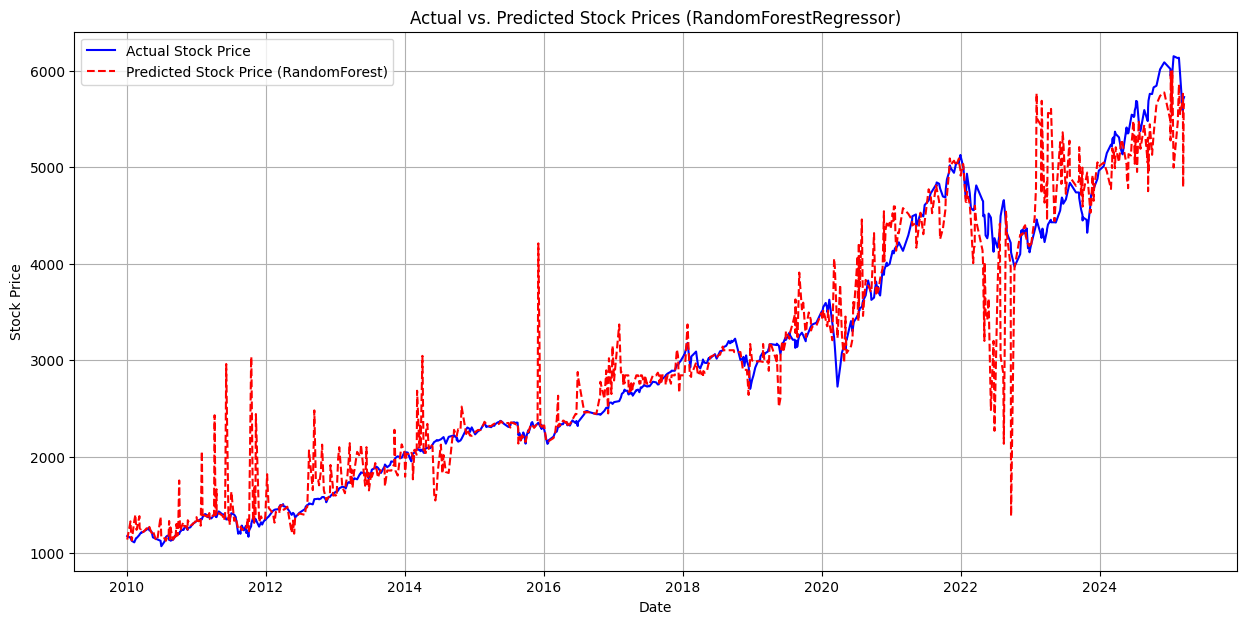

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(rf_plot_df['Date'], rf_plot_df['Actual'], label='Actual Stock Price', color='blue')
plt.plot(rf_plot_df['Date'], rf_plot_df['Predicted'], label='Predicted Stock Price (RandomForest)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (RandomForestRegressor)')
plt.legend()
plt.grid(True)
plt.show()

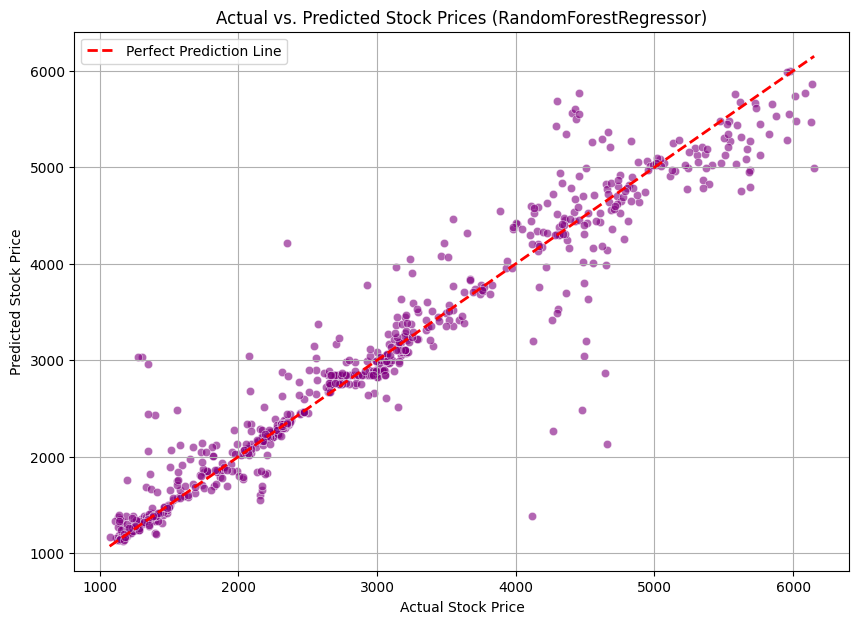

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs. Predicted Stock Prices (RandomForestRegressor)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import numpy as np

def predict_stock_price_rf(new_data_value, new_data_change_value):
    
    new_input = np.array([[new_data_value, new_data_change_value]])

    new_input_scaled = scaler.transform(new_input)

    predicted_price = rf_model.predict(new_input_scaled)

    return predicted_price[0]

print("RandomForestRegressor prediction function created successfully.")

RandomForestRegressor prediction function created successfully.


In [20]:
# Example 1: Using the average 'Data' and 'Data_Change' from the dataset
example_data_1_rf = df_merged['Data'].mean()
example_data_change_1_rf = df_merged['Data_Change'].mean()
predicted_price_1_rf = predict_stock_price_rf(example_data_1_rf, example_data_change_1_rf)
print(f"RF Predicted stock price for Data={example_data_1_rf:.3f}, Data_Change={example_data_change_1_rf:.3f}: {predicted_price_1_rf:.2f}")

# Example 2: Using the last known 'Data' and 'Data_Change' from the dataset
last_data_value_rf = df_merged['Data'].iloc[-1]
last_data_change_value_rf = df_merged['Data_Change'].iloc[-1]
predicted_price_2_rf = predict_stock_price_rf(last_data_value_rf, last_data_change_value_rf)
print(f"RF Predicted stock price for Data={last_data_value_rf:.3f}, Data_Change={last_data_change_value_rf:.3f}: {predicted_price_2_rf:.2f}")

# Example 3: Custom values
custom_data_value_rf = 1.5
custom_data_change_value_rf = 0.01
predicted_price_3_rf = predict_stock_price_rf(custom_data_value_rf, custom_data_change_value_rf)
print(f"RF Predicted stock price for Data={custom_data_value_rf:.3f}, Data_Change={custom_data_change_value_rf:.3f}: {predicted_price_3_rf:.2f}")

RF Predicted stock price for Data=0.582, Data_Change=0.000: 1224.50
RF Predicted stock price for Data=2.369, Data_Change=0.004: 5719.21
RF Predicted stock price for Data=1.500, Data_Change=0.010: 1349.88


C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\manis\anacon

## Combined Visualization: Actual vs. Predicted Stock Prices (Linear Regression vs. RandomForestRegressor)

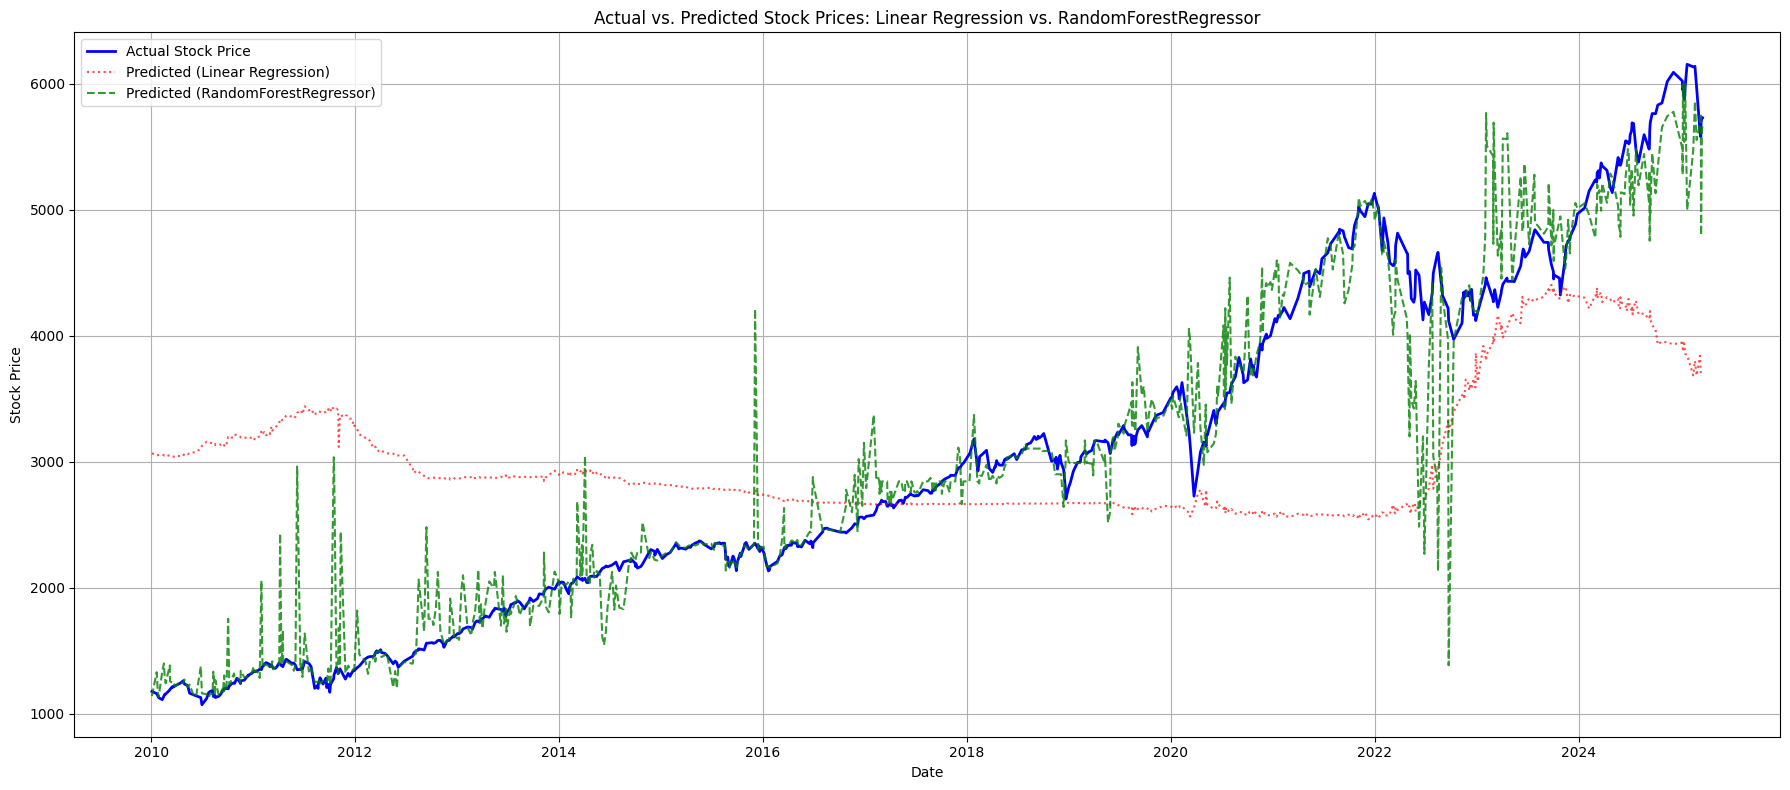

In [21]:
import matplotlib.pyplot as plt

combined_plot_df = pd.DataFrame({
    'Date': df_merged.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Linear_Regression_Predicted': y_pred,
    'RandomForest_Predicted': rf_y_pred
}).sort_values(by='Date').reset_index(drop=True)

plt.figure(figsize=(18, 8))
plt.plot(combined_plot_df['Date'], combined_plot_df['Actual'], label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(combined_plot_df['Date'], combined_plot_df['Linear_Regression_Predicted'], label='Predicted (Linear Regression)', color='red', linestyle=':', alpha=0.7)
plt.plot(combined_plot_df['Date'], combined_plot_df['RandomForest_Predicted'], label='Predicted (RandomForestRegressor)', color='green', linestyle='--', alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices: Linear Regression vs. RandomForestRegressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
